In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants 
from scipy.optimize import curve_fit
#### PLOT THE DATA #######
SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 28
plt.rcParams["font.family"] = "serif"
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)   # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [2]:
from ion_properties import lead,calcium,xenon,xenon2nd


Also plot dp/p

In [3]:
# import matplotlib.pyplot as plt
# import numpy as np

# fig, ax1 = plt.subplots(figsize=(12, 8))
# # plt.rcParams.update({'font.size': 25})
# cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

# # Create a second y-axis
# ax2 = ax1.twinx()

# # Lists to store handles and labels
# handles = []
# labels = []

# for ion_loop in [lead]:
#     loaded_data = np.load(f'results/transverse/{ion_loop.name}.npz')

#     delta = loaded_data['delta']
#     zeta = loaded_data['zeta']
#     state = loaded_data['state']
#     x = loaded_data['x'] 
#     time = loaded_data['time']
#     s_per_turn = loaded_data['s_per_turn']
#     px = loaded_data['px']
#     action_x = loaded_data['action_x']
#     action_y = loaded_data['action_y']
#     emittance_x = loaded_data['emittance_x']
#     rms_dp_p = np.std(delta, axis=1)
    
#     window_size=10
#     smoothed_rms_dp_p = np.convolve(rms_dp_p, np.ones(window_size)/window_size, mode='valid')

#     # Plot on ax1 and collect handles and labels
#     line1, = ax1.plot(time, emittance_x, linestyle='-', label=f'Normalized emittance',color=cycle[0])
#     handles.append(line1)
#     labels.append(f'Normalized emittance')
    
#     # Plot on ax2 and collect handles and labels
#     # line2, = ax2.plot(time[:len(smoothed_rms_dp_p)], smoothed_rms_dp_p, label=f'{ion_loop.name} dp/p')
#     line2, = ax2.plot(time, rms_dp_p, label=f'RMS dp/p',color=cycle[1])
#     handles.append(line2)
#     labels.append(f'RMS dp/p')

# ax1.set_xlabel('Time (s)')
# ax1.set_ylabel('Normalized emittance $\epsilon_x$ [rad m]')
# ax2.set_ylabel('RMS dp/p')
# ax1.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
# ax2.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# # Combine handles and labels from both axes into a single legend
# plt.legend(handles, labels, loc='upper right')

# plt.tight_layout()
# plt.savefig('figures/Lead_horizontal_cooling.png', dpi=300)
# plt.show()


<>:41: SyntaxWarning: invalid escape sequence '\e'
<>:41: SyntaxWarning: invalid escape sequence '\e'
/tmp/pkruyt/ipykernel_33098/662454725.py:41: SyntaxWarning: invalid escape sequence '\e'
  ax1.set_ylabel('Normalized emittance $\epsilon_x$ [rad m]')


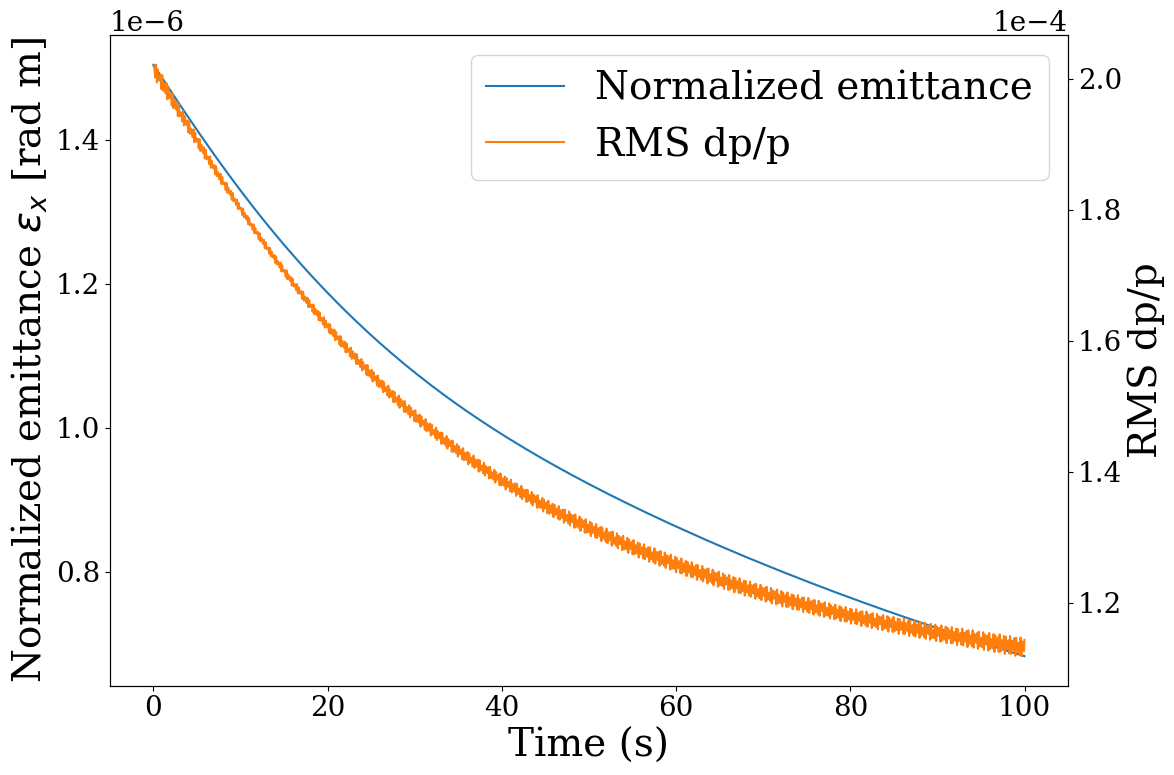

In [4]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots(figsize=(12, 8))
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

ax2 = ax1.twinx()

handles = []
labels = []

for ion_loop in [lead]:
    loaded_data = np.load(f'results/transverse/{ion_loop.name}.npz')

    delta = loaded_data['delta']
    zeta = loaded_data['zeta']
    state = loaded_data['state']
    x = loaded_data['x'] 
    time = loaded_data['time']
    s_per_turn = loaded_data['s_per_turn']
    px = loaded_data['px']
    action_x = loaded_data['action_x']
    action_y = loaded_data['action_y']
    emittance_x = loaded_data['emittance_x']
    rms_dp_p = np.std(delta, axis=1)

    # Create an index array to select every 10th point
    index = np.arange(0, len(time), 10)
    if index[-1] != len(time) - 1:
        index = np.append(index, len(time) - 1)

    line1, = ax1.plot(time[index], emittance_x[index], linestyle='-', label=f'Normalized emittance', color=cycle[0])
    handles.append(line1)
    labels.append(f'Normalized emittance')

    line2, = ax2.plot(time[index], rms_dp_p[index], label=f'RMS dp/p', color=cycle[1])
    handles.append(line2)
    labels.append(f'RMS dp/p')

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Normalized emittance $\epsilon_x$ [rad m]')
ax2.set_ylabel('RMS dp/p')
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

plt.legend(handles, labels, loc='upper right')

plt.tight_layout()
plt.savefig('figures/Horizontal_cooling.png', dpi=300)
plt.show()


In [5]:
time[index[-1]]

99.9802499599439

plot the phase space

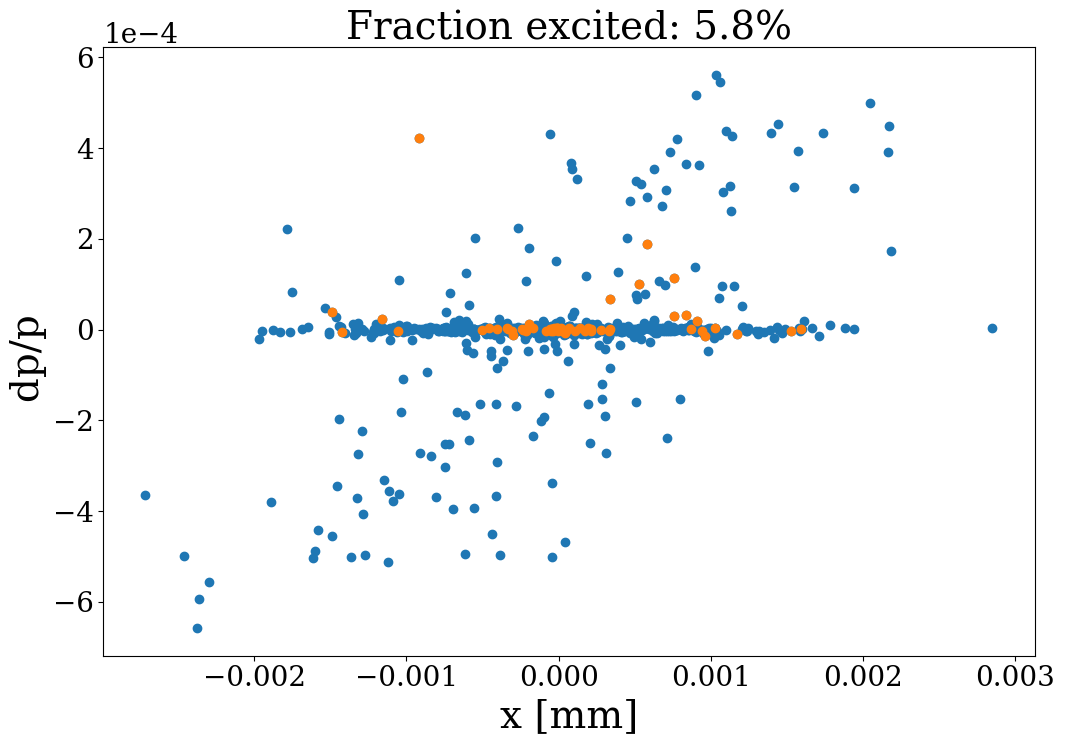

In [8]:
for ion_loop in [lead]:
    loaded_data = np.load(f'results/transverse/{ion_loop.name}.npz')

    delta = loaded_data['delta']
    zeta = loaded_data['zeta']
    state = loaded_data['state']
    x = loaded_data['x'] 
    time = loaded_data['time']
    s_per_turn = loaded_data['s_per_turn']
    px = loaded_data['px']
    action_x = loaded_data['action_x']
    action_y = loaded_data['action_y']
    emittance_x = loaded_data['emittance_x']
    rms_dp_p = np.std(delta, axis=1)

turn=-1
excited=state==2
excited0=excited[turn,:]
fraction_excitation0 = sum(excited0)/len(excited0)*100


plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
plt.title(f'Fraction excited: {round(fraction_excitation0, 1)}%')

#plt.axvline(laser_x,color='red')
# plt.axvline(laser_x+laser_waist_radius,color='red')
# plt.axvline(laser_x-laser_waist_radius,color='red')

plt.scatter(x[turn],delta[turn])
plt.scatter(x[turn][excited0],delta[turn][excited0])
plt.xlabel('x [mm]')
plt.ylabel('dp/p ')
plt.tight_layout()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
#plt.savefig('First_turn.eps', format='eps', dpi=300)
plt.show()

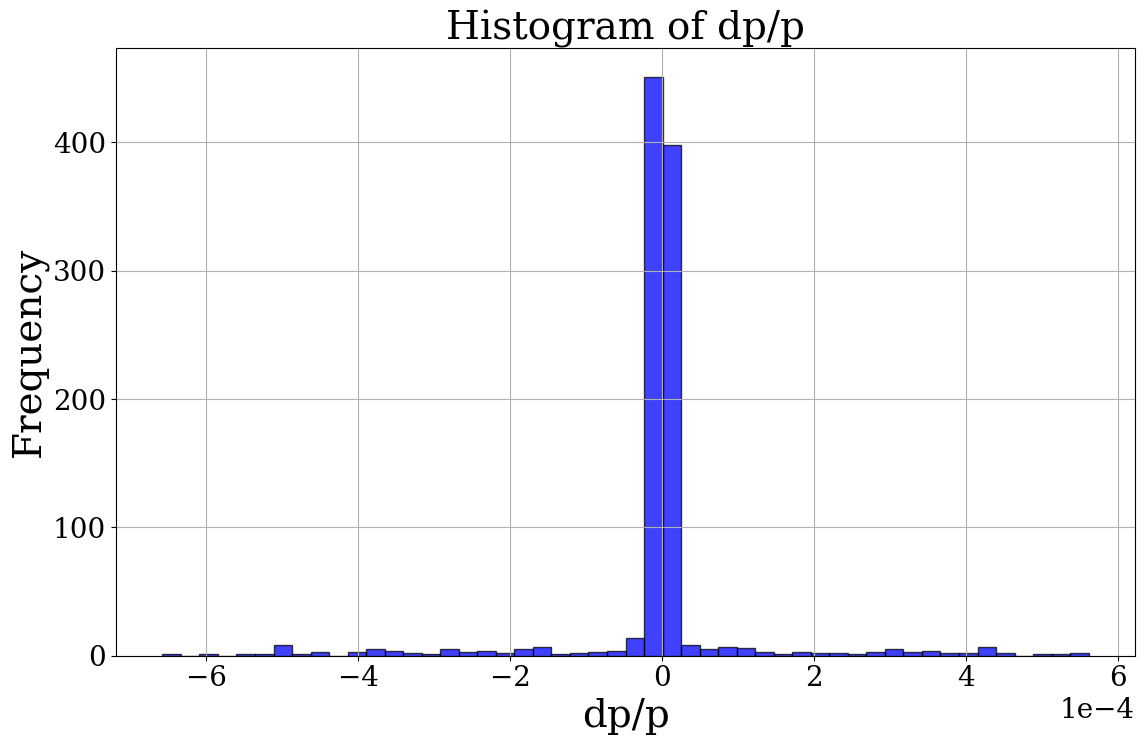

In [10]:
# Plot dp/p histogram
plt.figure(figsize=(12, 8))
plt.hist(delta[turn], bins=50, alpha=0.75, color='blue', edgecolor='black')
plt.xlabel('dp/p')
plt.ylabel('Frequency')
plt.title('Histogram of dp/p')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.grid(True)
plt.tight_layout()
plt.show()

look at results of full lattice tracking 

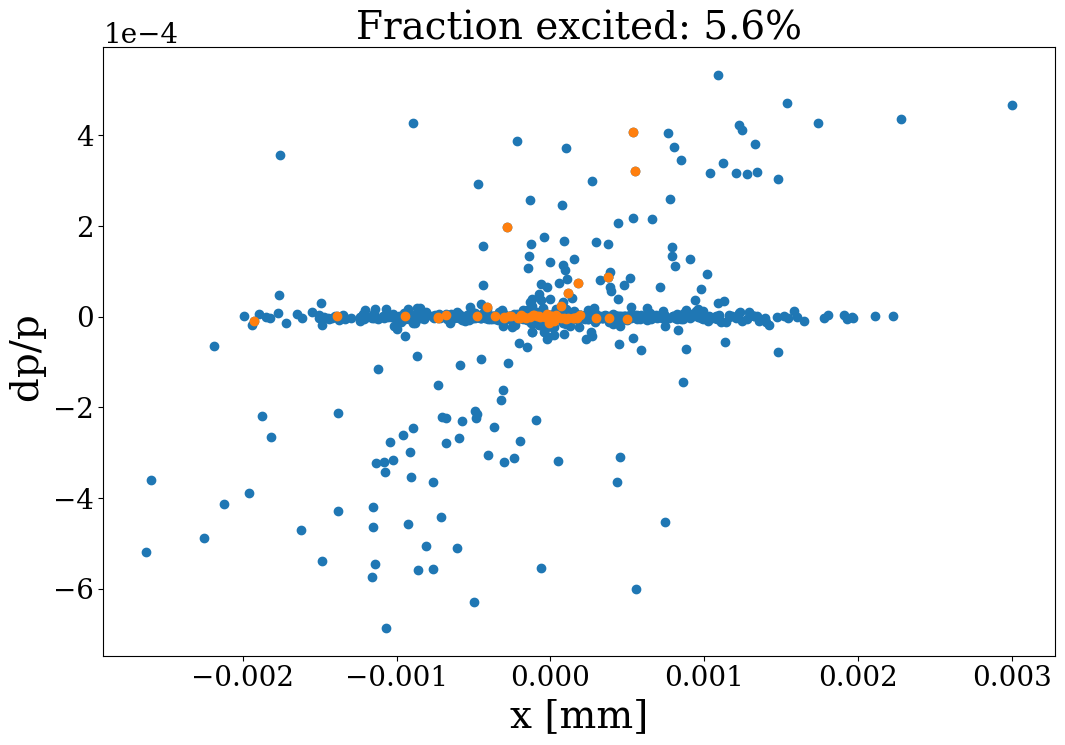

In [15]:
for ion_loop in [lead]:
    loaded_data = np.load(f'full_lattice/results/{ion_loop.name}.npz')

    delta = loaded_data['delta']
    zeta = loaded_data['zeta']
    state = loaded_data['state']
    x = loaded_data['x'] 
    time = loaded_data['time']
    s_per_turn = loaded_data['s_per_turn']
    px = loaded_data['px']
    action_x = loaded_data['action_x']
    action_y = loaded_data['action_y']
    emittance_x = loaded_data['emittance_x']
    rms_dp_p = np.std(delta, axis=1)

turn=-1
excited=state==2
excited0=excited[turn,:]
fraction_excitation0 = sum(excited0)/len(excited0)*100


plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
plt.title(f'Fraction excited: {round(fraction_excitation0, 1)}%')

#plt.axvline(laser_x,color='red')
# plt.axvline(laser_x+laser_waist_radius,color='red')
# plt.axvline(laser_x-laser_waist_radius,color='red')

plt.scatter(x[turn],delta[turn])
plt.scatter(x[turn][excited0],delta[turn][excited0])
plt.xlabel('x [mm]')
plt.ylabel('dp/p ')
plt.tight_layout()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
#plt.savefig('First_turn.eps', format='eps', dpi=300)
plt.show()